In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tf.__version__

'2.5.0'

In [3]:
import struct, os

In [4]:
def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte"%kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte"%kind)
    # label
    with open(labels_path, "rb") as la_path:
        magic, n = struct.unpack(">II", la_path.read(8))
        labels = np.fromfile(la_path, dtype = np.uint8)
    
    # image
    with open(images_path, "rb") as img_path:
        magic, num, rows, cols = struct.unpack(">IIII", img_path.read(16))
        images = np.fromfile(img_path, dtype = np.uint8).reshape(len(labels), 28**2)
        images = ((images/255)-0.5)*2
    
    return images, labels

In [6]:
X_train, y_train = load_mnist("./", kind = "train")
X_test, y_test = load_mnist("./", kind = "t10k")
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])

60000 784
10000 784


In [34]:
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)
X_train_centered = (X_train - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val
X_train_centered

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_train_onehot[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [37]:
# DNN
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(
        units = 50,
        input_dim = X_train_centered.shape[1],
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'tanh'
        
    )
)

# 두 번째 은닉층(학습층) 앞에서 50개의 모델 유닛이 있었으므로, input_dim 도 이번엔 50개를 학습시킨다.

model.add(
    tf.keras.layers.Dense(
        units = 50,
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'tanh'
        
    )
)

# 세 번째 은닉층(학습층). 마지막 학습층이므로 activation 이 달라짐.(softmax => 이건 이거야! 가 아니라 이게 제일 확률 높은데~? 이거같아!)

model.add(
    tf.keras.layers.Dense(
        units = 10,
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'softmax'
        
    )
)


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [39]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.0001, decay = 1e-7, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss = "categorical_crossentropy")

In [40]:
# 딥러닝은 돌아갈 것이 많으므로 batch 사이즈 지정 필요. 64개의 이미지 한 묶음으로 처리하도록.
model.fit(X_train_centered, y_train_onehot, batch_size = 64, epochs = 50, verbose = 1, validation_split = 0.1)

Epoch 1/50
844/844 [==============================] - 1s 1ms/step - loss: 1.6905 - val_loss: 1.1833
Epoch 2/50
844/844 [==============================] - 1s 1ms/step - loss: 1.0610 - val_loss: 0.8588
Epoch 3/50
844/844 [==============================] - 1s 1ms/step - loss: 0.8373 - val_loss: 0.6921
Epoch 4/50
844/844 [==============================] - 1s 1ms/step - loss: 0.7084 - val_loss: 0.5899
Epoch 5/50
844/844 [==============================] - 1s 1ms/step - loss: 0.6242 - val_loss: 0.5212
Epoch 6/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5650 - val_loss: 0.4723
Epoch 7/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5210 - val_loss: 0.4356
Epoch 8/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4872 - val_loss: 0.4074
Epoch 9/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4603 - val_loss: 0.3848
Epoch 10/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4383 - val_loss: 0.3664

In [15]:
y_train_pred = model.predict_classes(X_train_centered, verbose = 0)
y_train_pred[:3]

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0], dtype=int64)

In [41]:
total_predicts = np.sum(y_train == y_train_pred, axis = 0)
print(total_predicts)
train_res = total_predicts/y_train.shape[0]
print(train_res)

5923
0.09871666666666666


In [42]:
y_test_pred = model.predict_classes(X_test_centered, verbose=0)
y_test_pred[:3]

array([7, 2, 1], dtype=int64)

In [43]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [44]:
total_predicts = np.sum(y_test == y_test_pred, axis = 0)
print(total_predicts)
test_res = total_predicts/y_test.shape[0]
print(test_res)

9339
0.9339


In [45]:
n = 0
for i, y in enumerate(y_test):
    if y != y_test_pred[i]:
        print(i, y, y_test_pred[i])
        n+=1
        
print(n)

8 5 6
33 4 6
38 2 3
62 9 4
63 3 2
92 9 4
124 7 4
149 2 9
195 3 5
217 6 5
233 8 7
241 9 8
245 3 5
247 4 2
259 6 0
261 5 3
290 8 4
300 4 1
318 2 3
320 9 7
321 2 7
340 5 3
352 5 0
359 9 4
362 2 7
380 0 5
381 3 7
412 5 3
435 8 7
444 2 8
445 6 0
448 9 8
449 3 5
464 3 7
478 5 8
479 9 3
495 8 3
502 5 3
507 3 5
528 3 2
531 3 6
542 8 4
543 8 3
551 7 1
565 4 9
578 3 2
582 8 2
591 8 3
610 4 6
613 2 8
619 1 8
627 9 4
628 3 9
629 2 6
658 7 0
659 2 8
684 7 3
691 8 4
707 4 9
717 0 6
720 5 8
740 4 9
760 4 9
810 7 2
839 8 3
844 8 7
857 5 3
881 4 9
882 9 7
924 2 7
938 3 5
947 8 9
950 7 2
956 1 2
959 4 5
965 6 0
975 2 3
982 3 8
1003 5 3
1014 6 5
1032 5 8
1039 7 1
1044 6 8
1050 2 6
1062 3 7
1068 8 4
1082 5 3
1092 3 1
1101 8 3
1107 9 3
1112 4 6
1114 3 8
1124 8 7
1128 3 2
1131 5 4
1147 4 9
1181 6 1
1192 9 4
1194 7 9
1198 8 4
1200 8 5
1202 8 5
1204 3 9
1224 2 6
1226 7 2
1228 9 3
1232 9 4
1242 4 9
1247 9 0
1248 8 5
1251 2 6
1256 2 7
1260 7 1
1283 7 2
1289 5 4
1299 5 7
1310 3 7
1319 8 3
1326 7 2
1347 7 9
1364 

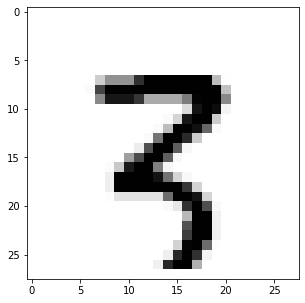

In [51]:
plt.figure(figsize = (5, 5))
image = np.reshape(X_test[1204], [28, 28])
plt.imshow(image, cmap = "Greys")
plt.show()

In [52]:
# CNN (Convolutional Neural Network)

In [53]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding = 'valid'))

In [55]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding = 'valid', activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (5, 5), padding = 'valid', activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
# 2d 를 flat으로 다 펴버림.
# 이제 일반 모델처럼 된 것. (이미지 => 데이터 형태로 들어옴.)

model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))                       # overfit 방지(50% 학습을 안 시키는 것.)
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             